# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    #print(lat_lng)
    
    # If the city is unique, then add it to a our  list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
#len(cities)
cities

['opuwo',
 'hermanus',
 'rikitea',
 'tabou',
 'thompson',
 'puerto ayora',
 'chumikan',
 'mataura',
 'constitucion',
 'luderitz',
 'nome',
 'port alfred',
 'sentyabrskiy',
 'acajutla',
 'ust-nera',
 'nouakchott',
 'port blair',
 'barentsburg',
 'kutum',
 'boddam',
 'hasaki',
 'saskylakh',
 'mouzakion',
 'taolanaro',
 'karratha',
 'east london',
 'kahului',
 'yellowknife',
 'vila velha',
 'fukue',
 'ciudad bolivar',
 'atuona',
 'ushuaia',
 'hilo',
 'victoria',
 'chivay',
 'barrow',
 'grand river south east',
 'kampene',
 'souillac',
 'vaini',
 'nanortalik',
 'qaanaaq',
 'ilulissat',
 'nicoya',
 'port augusta',
 'burica',
 'tres arroyos',
 'guarapari',
 'cidreira',
 'salalah',
 'moranbah',
 'millinocket',
 'buala',
 'jamestown',
 'busselton',
 'lebu',
 'shenjiamen',
 'amderma',
 'hithadhoo',
 'codrington',
 'hami',
 'tawang',
 'sao borja',
 'dikson',
 'bengkulu',
 'ust-kuyga',
 'bucerias',
 'westport',
 'aklavik',
 'hobart',
 'mixtequilla',
 'vanavara',
 'saldanha',
 'cape town',
 'mansa

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
city_list = []
lat_list = []
lng_list = []
max_temp_list = []
humidity_list = []
cloudiness_list = []
wind_speed_list = []
country_list = []
date_list = []
record_counter = 0
record_set = 1


In [5]:
# Save config information
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#Build query URL
query_url = f"{base_url}appid={api_key}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=a7ee23418a8d83b3032366353bbb4d05&units=imperial&q=


In [6]:
print("Beginning Data Retrieval")  
print("-----------------------------")

for city in cities:
    response = requests.get(query_url + city)
    weather_response = response.json() 
    
    try:
         
        city_list.append(weather_response["name"])
        lat_list.append(weather_response["coord"]["lat"])
        lng_list.append(weather_response["coord"]["lon"])
        max_temp_list.append(weather_response["main"]["temp_max"])
        humidity_list.append(weather_response["main"]["humidity"])
        cloudiness_list.append(weather_response["clouds"]["all"])
        wind_speed_list.append(weather_response["wind"]["speed"])
        country_list.append(weather_response["sys"]["country"])
        date_list.append(weather_response["dt"])
        if  record_counter > 49:
            record_counter =  0
            record_set = record_set +1 
        else:
            record_counter += 1
        print(f"Processing Record {record_counter} of Set {record_set} | {city}")     
       
          
    except: 
        print("City not found. Skipping...")
    
print("----------------------------")
print("Data Retrieval Complete" )
print("----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | opuwo
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | tabou
Processing Record 5 of Set 1 | thompson
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | chumikan
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | constitucion
Processing Record 10 of Set 1 | luderitz
Processing Record 11 of Set 1 | nome
Processing Record 12 of Set 1 | port alfred
City not found. Skipping...
Processing Record 13 of Set 1 | acajutla
Processing Record 14 of Set 1 | ust-nera
Processing Record 15 of Set 1 | nouakchott
Processing Record 16 of Set 1 | port blair
City not found. Skipping...
Processing Record 17 of Set 1 | kutum
Processing Record 18 of Set 1 | boddam
Processing Record 19 of Set 1 | hasaki
Processing Record 20 of Set 1 | saskylakh
City not found. Skipping...
City not found. Skipping...
Processing Record 21 of S

Processing Record 29 of Set 4 | mount isa
Processing Record 30 of Set 4 | bilibino
Processing Record 31 of Set 4 | ossett
Processing Record 32 of Set 4 | kilindoni
Processing Record 33 of Set 4 | bol
Processing Record 34 of Set 4 | margate
Processing Record 35 of Set 4 | marystown
Processing Record 36 of Set 4 | san isidro
Processing Record 37 of Set 4 | ouesso
Processing Record 38 of Set 4 | comodoro rivadavia
Processing Record 39 of Set 4 | ponta delgada
Processing Record 40 of Set 4 | biltine
Processing Record 41 of Set 4 | tuktoyaktuk
Processing Record 42 of Set 4 | ostrovnoy
Processing Record 43 of Set 4 | sao bento do sul
Processing Record 44 of Set 4 | mainit
Processing Record 45 of Set 4 | fort nelson
Processing Record 46 of Set 4 | fortuna
Processing Record 47 of Set 4 | cranbrook
Processing Record 48 of Set 4 | port hardy
Processing Record 49 of Set 4 | asau
City not found. Skipping...
Processing Record 50 of Set 4 | dudinka
Processing Record 0 of Set 5 | san quintin
Processi

Processing Record 15 of Set 8 | kawalu
Processing Record 16 of Set 8 | lazaro cardenas
City not found. Skipping...
Processing Record 17 of Set 8 | maragogi
Processing Record 18 of Set 8 | hamilton
Processing Record 19 of Set 8 | bandarbeyla
Processing Record 20 of Set 8 | harper
Processing Record 21 of Set 8 | rudnichnyy
Processing Record 22 of Set 8 | chapais
Processing Record 23 of Set 8 | komsomolskoye
Processing Record 24 of Set 8 | sisimiut
City not found. Skipping...
Processing Record 25 of Set 8 | hovd
City not found. Skipping...
Processing Record 26 of Set 8 | swinoujscie
Processing Record 27 of Set 8 | lodja
Processing Record 28 of Set 8 | chuy
Processing Record 29 of Set 8 | puerto escondido
Processing Record 30 of Set 8 | domoni
City not found. Skipping...
Processing Record 31 of Set 8 | kavieng
Processing Record 32 of Set 8 | wenling
Processing Record 33 of Set 8 | albanel
Processing Record 34 of Set 8 | turukhansk
Processing Record 35 of Set 8 | dolores
City not found. Ski

Processing Record 45 of Set 11 | yerbogachen
Processing Record 46 of Set 11 | inuvik
Processing Record 47 of Set 11 | takoradi
Processing Record 48 of Set 11 | san rafael
Processing Record 49 of Set 11 | imeni poliny osipenko
Processing Record 50 of Set 11 | yakima
Processing Record 0 of Set 12 | beringovskiy
Processing Record 1 of Set 12 | arcachon
Processing Record 2 of Set 12 | touros
----------------------------
Data Retrieval Complete
----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
city_weather_df = pd.DataFrame({
    "City": city_list,
    "Lat": lat_list,
    "Lng": lng_list,
    "Max Temp": max_temp_list,
    "Humidity": humidity_list,
    "Cloudiness": cloudiness_list,
    "Wind Speed": wind_speed_list,
    "Country":country_list,
    "Date":date_list
})

city_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Opuwo,-18.0607,13.8400,71.58,35,89,4.23,NA,1666664760
1,Hermanus,-34.4187,19.2345,61.81,70,100,10.09,ZA,1666665033
2,Rikitea,-23.1203,-134.9692,73.35,81,2,15.32,PF,1666665024
3,Tabou,4.4230,-7.3528,76.35,92,38,7.29,CI,1666664613
4,Thompson,55.7435,-97.8558,30.36,93,100,18.41,CA,1666664633
...,...,...,...,...,...,...,...,...,...
558,Imeni Poliny Osipenko,52.4201,136.4853,40.48,41,61,8.10,RU,1666665392
559,Yakima,46.4665,-120.6678,53.53,58,0,21.85,US,1666665393
560,Beringovskiy,63.0500,179.3167,30.11,82,100,7.31,RU,1666665393
561,Arrondissement d'Arcachon,44.5875,-1.0519,53.92,87,0,0.00,FR,1666665393


In [8]:
city_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,5.630000e+02
mean,21.019646,18.032666,59.232860,74.358792,59.552398,7.925808,1.666665e+09
std,33.669440,88.928597,20.094788,19.743891,40.405489,5.666958,2.297270e+02
min,-54.800000,-175.200000,-5.780000,16.000000,0.000000,0.000000,1.666664e+09
25%,-6.344450,-59.126750,46.725000,63.000000,18.000000,3.440000,1.666665e+09
50%,26.326000,23.433300,63.790000,80.000000,75.000000,6.910000,1.666665e+09
75%,49.049950,93.245400,75.435000,91.000000,100.000000,11.110000,1.666665e+09
max,78.218600,179.316700,96.570000,100.000000,100.000000,30.600000,1.666665e+09


In [9]:
city_weather_df.to_csv("../output_data/cities.csv", index= False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
city_weather_df[(city_weather_df["Humidity"] >100)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [11]:
#  Get the indices of cities that have humidity over 100%.


In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

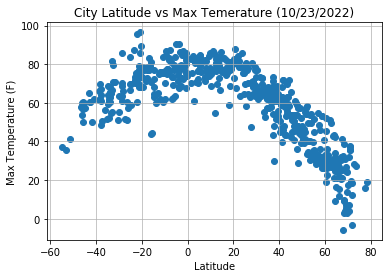

In [57]:
plt.scatter(city_weather_df['Lat'],city_weather_df['Max Temp'])
plt.grid(linestyle='-', linewidth=0.7)
plt.xlabel('Latitude')
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs Max Temerature (10/23/2022)")
plt.savefig("../output_data/CityLatitude_vs_MaxTemerature.png")
plt.show()

## Latitude vs. Humidity Plot

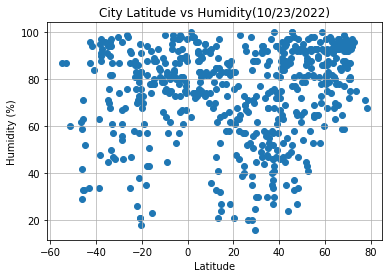

In [58]:
plt.scatter(city_weather_df['Lat'],city_weather_df['Humidity'])
plt.grid(linestyle='-', linewidth=0.7)
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity(10/23/2022)")
plt.savefig("../output_data/CityLatitude_vs_Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

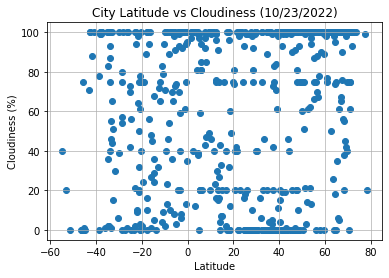

In [59]:
plt.scatter(city_weather_df['Lat'],city_weather_df['Cloudiness'])
plt.grid(linestyle='-', linewidth=0.7)
plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (10/23/2022)")
plt.savefig("../output_data/CityLatitude_vs_Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

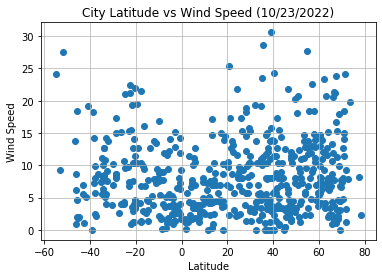

In [60]:
plt.scatter(city_weather_df['Lat'],city_weather_df['Wind Speed'])
plt.grid(linestyle='-', linewidth=0.7)
plt.xlabel('Latitude')
plt.ylabel("Wind Speed")
plt.title("City Latitude vs Wind Speed (10/23/2022)")
plt.savefig("../output_data/CityLatitude_vs_WindSpeed.png")
plt.show()

## Linear Regression

In [61]:
nh = city_weather_df[city_weather_df['Lat'] >= 0]
sh = city_weather_df[city_weather_df['Lat'] <0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8043138205086903
Negative and Strong correlation
Anlaysis: Temperature progressivey decrease the further you get from the equator.


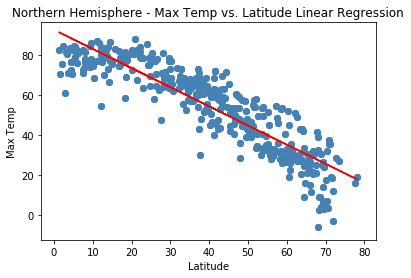

In [62]:
x_values = nh["Lat"]
y_values = nh['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values , color = "steelblue")
plt.plot(x_values,regress_values,"r-")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
print("Negative and Strong correlation")
print("Anlaysis: Temperature progressivey decrease the further you get from the equator.")
plt.savefig("../output_data/NH_MaxTemp_vs_CityLatitude")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.3998190199798992
Positive and weak correlation
Anlaysis: The closer you get to the equater, the temperture gradually increases


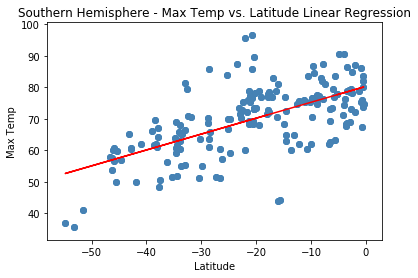

In [63]:
x_values = sh["Lat"]
y_values = sh['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values , color = "steelblue")
plt.plot(x_values,regress_values,"r-")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
print("Positive and weak correlation")
print("Anlaysis: The closer you get to the equater, the temperture gradually increases")
plt.savefig("../output_data/SH_MaxTemp_vs_CityLatitude")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.057551830442062635
Positive and weak correlation
Analysis: Based off of the latidue, humidty tends to cluster togther in extereme weather conditions


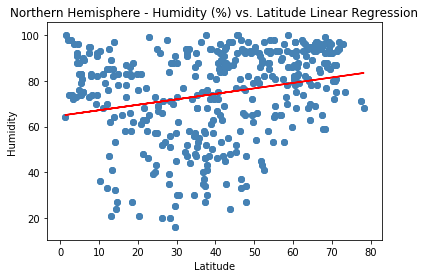

In [64]:
x_values = nh["Lat"]
y_values = nh['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values , color = "steelblue")
plt.plot(x_values,regress_values,"r-")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
print("Positive and weak correlation")
print("Analysis: Based off of the latidue, humidty tends to cluster togther in extereme weather conditions" )
plt.savefig("../output_data/NH_Humidity_vs_CityLatitude")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.039138375280388875


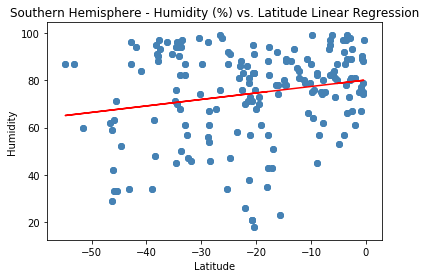

In [65]:
x_values = sh["Lat"]
y_values = sh['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values , color = "steelblue")
plt.plot(x_values,regress_values,"r-")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/SH_Humidity_vs_CityLatitude")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.048833832939211876


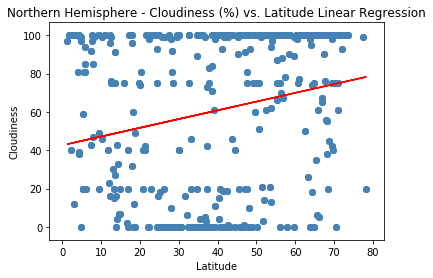

In [66]:
x_values = nh["Lat"]
y_values = nh['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values , color = "steelblue")
plt.plot(x_values,regress_values,"r-")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/NH_Cloudiness_vs_CityLatitude")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.03554465353225898


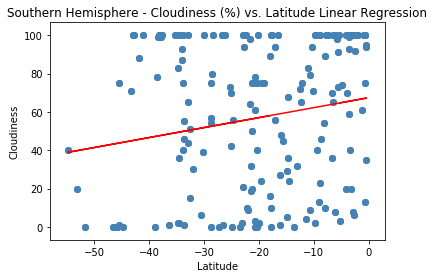

In [67]:
x_values = sh["Lat"]
y_values = sh['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values , color = "steelblue")
plt.plot(x_values,regress_values,"r-")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/SH_Cloudiness_vs_CityLatitude")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03304564204937815


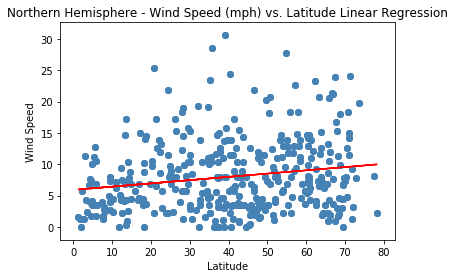

In [68]:
x_values = nh["Lat"]
y_values = nh['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values , color = "steelblue")
plt.plot(x_values,regress_values,"r-")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/NH_WindSpeed_vs_CityLatitude")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.05177412359264094


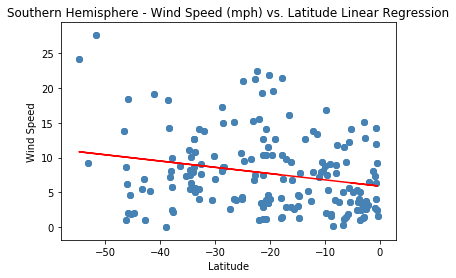

In [69]:
x_values = sh["Lat"]
y_values = sh['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values , color = "steelblue")
plt.plot(x_values,regress_values,"r-")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/SH_WindSpeed_vs_CityLatitude")
plt.show()